In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180536,124584.0,1.602362,-1.555162,-1.356675,-1.494245,-0.644272,-0.322423,-0.259441,-0.159933,2.091796,...,0.331747,0.583108,-0.173289,0.159907,-0.091009,-0.164506,-0.023792,0.005096,276.55,0
222602,143047.0,-1.829690,2.050740,-1.945653,-1.484203,0.619171,-1.404055,1.087986,0.254452,0.652165,...,0.081288,0.659280,-0.111991,-0.515029,0.016241,0.137662,0.870989,0.629460,7.70,0
3113,2681.0,-0.894198,1.393265,0.948166,-0.230612,0.268350,0.314000,-0.053867,-1.302204,-0.425555,...,1.314395,-1.084966,0.193117,-0.402054,-0.198843,0.118743,0.325320,0.095479,3.58,0
26633,34176.0,1.164424,-0.975218,0.255322,-0.448898,-1.395605,-0.993582,-0.453334,-0.177926,-0.571481,...,-0.195456,-0.381760,-0.102325,0.408984,0.218292,1.152343,-0.085062,0.024346,125.80,0
127149,78225.0,1.244385,-0.201602,-0.041321,-0.349838,-0.238339,-0.337071,-0.140437,-0.004202,0.150865,...,-0.100537,-0.422256,-0.097955,-0.479343,0.289152,0.994668,-0.100353,-0.010224,39.95,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93537.752033,-0.056089,-0.048291,0.050503,-0.062871,0.018989,-0.051526,-0.078094,0.005257,-0.001728,...,0.005000,0.023225,0.019322,-0.025719,-0.007046,-0.008396,0.032881,-0.020041,-0.015304,79.650091
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [15]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
180536  124584.0  1.602362 -1.555162 -1.356675 -1.494245 -0.644272 -0.322423   
222602  143047.0 -1.829690  2.050740 -1.945653 -1.484203  0.619171 -1.404055   
3113      2681.0 -0.894198  1.393265  0.948166 -0.230612  0.268350  0.314000   
26633    34176.0  1.164424 -0.975218  0.255322 -0.448898 -1.395605 -0.993582   
127149   78225.0  1.244385 -0.201602 -0.041321 -0.349838 -0.238339 -0.337071   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, Y_train)

LogisticRegression()

In [20]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [21]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9423728813559322


In [22]:
y_pred = model.predict(X_test)
LR_test_data_accuracy = accuracy_score(Y_test,y_pred)
LR_precision = precision_score(Y_test, y_pred)
LR_f1 = f1_score(Y_test, y_pred)
LR_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [23]:
print("Logistic Regression : ")
print("Accuracy : ",LR_test_data_accuracy)
print("Precision : ",LR_precision)
print("F1 : ",LR_f1)
print("Recall : ",LR_recall)
print(f'Classification Report:\n{classification_rep}')

Logistic Regression : 
Accuracy :  0.918918918918919
Precision :  0.9081632653061225
F1 :  0.8811881188118811
Recall :  0.8557692307692307
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       192
           1       0.91      0.86      0.88       104

    accuracy                           0.92       296
   macro avg       0.92      0.90      0.91       296
weighted avg       0.92      0.92      0.92       296



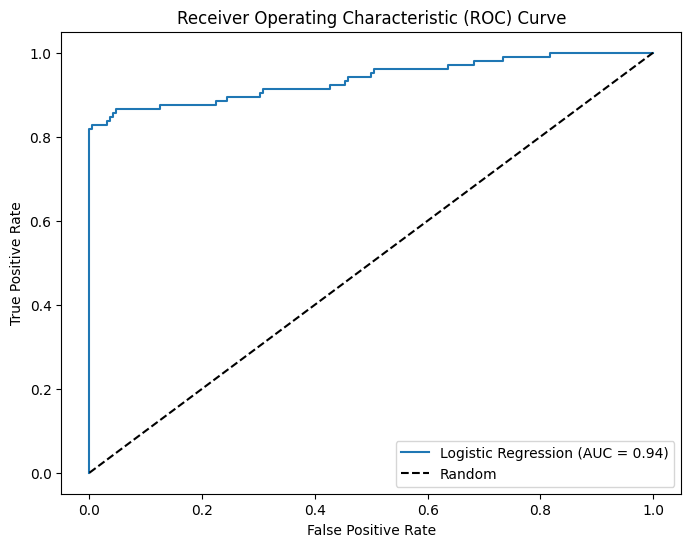

In [24]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()